In [1]:
import raillabel
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sys
from matplotlib.lines import Line2D

In [2]:
#data_path = "/workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.1/lidar/012_1631441453.299504000.pcd"
data_path = "/workspaces/baseline/data/OSDaR_dataset/v_2/3_fire_site_3.1/lidar/000_1631639431.131567000.pcd"
with open(data_path, "r") as b:
    scan = np.loadtxt(b, skiprows=11, usecols=(0,1,2,3,5))

df = pd.DataFrame(data=scan, columns=["X","Y","Z","intensity","sensor_id"])

### Export to las file for visualisation

In [4]:
# pcd_to_las(df[["X","Y","Z"]], export_path="/workspaces/baseline/exp/temporary_export/1_1_calibration.las", pred_segm=df["sensor_id"], intensity=df["intensity"])

In [5]:
df = df.sample(frac=1) #df.sort_values(by="sensor_id", ascending=True)

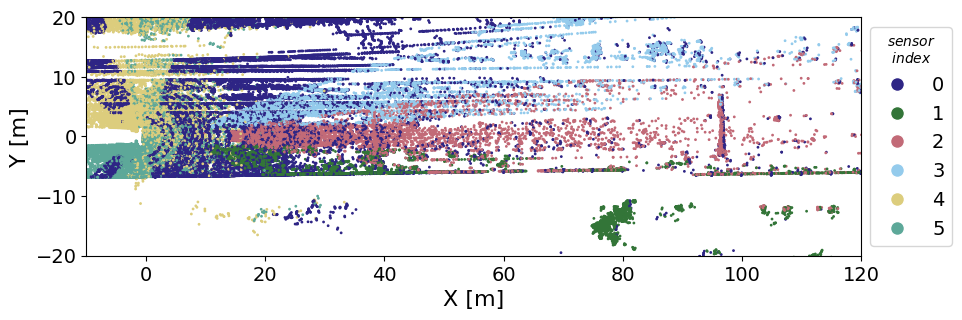

In [6]:
# color_map={0:[46,37,133],    # https://www.nceas.ucsb.edu/sites/default/files/2022-06/Colorblind%20Safe%20Color%20Schemes.pdf
#            1:[51,117,56],
#            2:[93,168,153],
#            3:[148,203,236],
#            4:[220,205,125],
#            5:[194,106,119]}

color_map={0:[46,37,133],    # https://www.nceas.ucsb.edu/sites/default/files/2022-06/Colorblind%20Safe%20Color%20Schemes.pdf
           1:[51,117,56],
           2:[194,106,119],
           3:[148,203,236],
           4:[220,205,125],
           5:[93,168,153]}

# Create 2D plot with sensor showing in point cloud 
# Extract data for the first plot
x1 = df["X"]
y1 = df["Y"]
c1 = [np.array(color_map[segmentation]) / 255 for segmentation in df["sensor_id"]]
#c1 = df["sensor_id"]/255 #[np.array(color_map[segmentation]) / 255 for segmentation in original_dict["segment"]]

# Create a figure with two subplots (one on top of the other)
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 7))

# Plot the first set of data on the first axis
scatter1 = ax1.scatter(x1, y1, c=c1, s=1)
ax1.set_xlim(-10, 120)
ax1.set_ylim(-20, 20)
ax1.set_aspect('equal')
#ax1.set_title("Point cloud colored by $\it{sensor \, \, index}$", fontsize=16)
ax1.set_xlabel('X [m]', fontsize=16)
ax1.set_ylabel('Y [m]', fontsize=16)

ax1.tick_params(axis='both', which='major', labelsize=14)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=np.array(color_map[0]) / 255, markersize=10, label='0'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=np.array(color_map[1]) / 255, markersize=10, label='1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=np.array(color_map[2]) / 255, markersize=10, label='2'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=np.array(color_map[3]) / 255, markersize=10, label='3'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=np.array(color_map[4]) / 255, markersize=10, label='4'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=np.array(color_map[5]) / 255, markersize=10, label='5'),
]

# Add the legend to the first subplot in the upper left corner
ax1.legend(handles=legend_elements, loc='center right', fontsize=14,title="$\it{sensor}$\n $\it{index}$", bbox_to_anchor=(1.13, 0.5))

fig.savefig("/workspaces/baseline/exp/temporary_export/pcd_by_sensor_index.jpeg", dpi=400,bbox_inches="tight")

In [7]:
df["planar_distance"] = df.apply(lambda x: np.linalg.norm([x.X,x.Y]), axis=1)

In [8]:
df_sensor_name = pd.DataFrame({"sensor_id":[0,1,2,3,4,5], "sensor_name":["medium_0","long_0","long_1","long_2","short_0","short_1"]})
df = df.merge(df_sensor_name, how="left", on="sensor_id")

In [10]:
display(df_sensor_name)

,sensor_id,sensor_name
0,0,medium_0
1,1,long_0
2,2,long_1
3,3,long_2
4,4,short_0
5,5,short_1


In [9]:
df.groupby(["sensor_name"]).agg(intensity_min = ("intensity","min"), intensity_max = ("intensity", "max"))

,intensity_min,intensity_max
sensor_name,,
long_0,0.000000,255.00
long_1,0.000000,255.00
long_2,0.000000,255.00
medium_0,0.000000,255.00
short_0,0.000969,52.75
short_1,0.000347,35.00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your actual DataFrame loading code

# Assume df has columns 'sensor_id' and 'intensity'
sensor_ids = ["long_0","long_1","long_2","medium_0", "short_0","short_1"]

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the grid size and figure size as needed

# Flatten the 2D array of axes for easy iteration
axs = axs.flatten()

# Plot histograms for each sensor_id
for i, sensor_id in enumerate(sensor_ids):
    # Filter the data for the current sensor_id
    data = df[df['sensor_name'] == sensor_id]['intensity']
    
    # Plot histogram in the current subplot
    axs[i].hist(data, bins=60, edgecolor='black')
    axs[i].set_title(f'Sensor: {sensor_id}')
    axs[i].set_xlabel('Intensity')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
plt.hist(df[df.sensor_name==0]["intensity"],40)

In [ ]:
min_height=('height', 'min')
grouped_df = df.groupby("sensor_id").agg(mean_intensity=("intensity","mean"),
                                        std_intensity=("intensity", "std"),
                                        mean_distance=("planar_distance","mean"),
                                        std_distance=("planar_distance","std")).reset_index()

In [ ]:
px.bar(grouped_df, x="sensor_id",y="mean_distance",barmode = 'group')#,error_y=grouped_df.std_distance)

In [ ]:
px.bar(grouped_df, x="sensor_id",y="mean_intensity",barmode = 'group')#error_y=grouped_df.std_intensity)

### Test multiple folder

In [3]:
columns = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

# Create an empty DataFrame with the specified columns
overall_df = pd.DataFrame(columns=columns)

### Get values for all pcds

In [4]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the base folder path
folder_path = "/workspaces/baseline/data/OSDaR_dataset/v_2"

# List of subfolders to consider
train_subfolders=["1_calibration_1.2","3_fire_site_3.1","3_fire_site_3.3","4_station_pedestrian_bridge_4.3","5_station_bergedorf_5.1","6_station_klein_flottbek_6.2","8_station_altona_8.1","8_station_altona_8.2","9_station_ruebenkamp_9.1","12_vegetation_steady_12.1","14_signals_station_14.1","15_construction_vehicle_15.1","20_vegetation_squirrel_20.1","21_station_wedel_21.1","21_station_wedel_21.2"]

# Generate the list of full paths for the specific subfolders
train_folders = [os.path.join(folder_path, subfolder) for subfolder in train_subfolders]

# Initialize histograms and statistics
bin_edges_small = np.arange(0, 1.05, 0.05)
bin_edges_large = np.arange(0, 256, 1)
histogram_4_small = np.zeros(len(bin_edges_small) - 1)
histogram_5_small = np.zeros(len(bin_edges_small) - 1)
histogram_large = {i: np.zeros(len(bin_edges_large) - 1) for i in range(6)}

intensity_sums = np.zeros(6)
intensity_max = np.full(6, -np.inf)
intensity_min = np.full(6, np.inf)
intensity_counts = np.zeros(6)

# Process each specified subfolder
i=0
for folder in train_folders:
    print(f'Processing folder: {folder}')
    
    # Find all .pcd files in the current subfolder and its subfolders
    pcd_files = glob.glob(os.path.join(folder, '**', '*.pcd'), recursive=True)
    
    for pcd_file in pcd_files:
        print(f'Processing file: {pcd_file}')
        
        # Load the data from the .pcd file
        with open(pcd_file, "r") as b:
            scan = np.loadtxt(b, skiprows=11, usecols=(0, 1, 2, 3, 5))  # Assume that sensor_id is in column 5
        
        # Convert to DataFrame
        df = pd.DataFrame(data=scan, columns=["X", "Y", "Z", "intensity", "sensor_id"])

        
        # Update histograms for sensors 4 and 5 (small range)
        hist_4_small, _ = np.histogram(df[df["sensor_id"] == 4]["intensity"], bins=bin_edges_small)
        hist_5_small, _ = np.histogram(df[df["sensor_id"] == 5]["intensity"], bins=bin_edges_small)
        histogram_4_small += hist_4_small
        histogram_5_small += hist_5_small
        
        # Update histograms for all sensors (large range)
        for sensor_id in range(6):
            sensor_intensities = df[df["sensor_id"] == sensor_id]["intensity"]
            hist_large, _ = np.histogram(sensor_intensities, bins=bin_edges_large)
            histogram_large[sensor_id] += hist_large
            
            # Update statistics for each sensor
            if not sensor_intensities.empty:
                intensity_sums[sensor_id] += sensor_intensities.sum()
                intensity_counts[sensor_id] += sensor_intensities.count()
                intensity_max[sensor_id] = max(intensity_max[sensor_id], sensor_intensities.max())
                intensity_min[sensor_id] = min(intensity_min[sensor_id], sensor_intensities.min())
    
# Calculate mean intensity for each sensor
intensity_mean = intensity_sums / intensity_counts




Processing folder: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/009_1631441714.999990000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/028_1631441716.899545000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/081_1631441722.199772000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/071_1631441721.199508000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/088_1631441722.899940000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/017_1631441715.799675000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/022_1631441716.299694000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/040_1631441718.099605000.pcd
Process

### Create plots

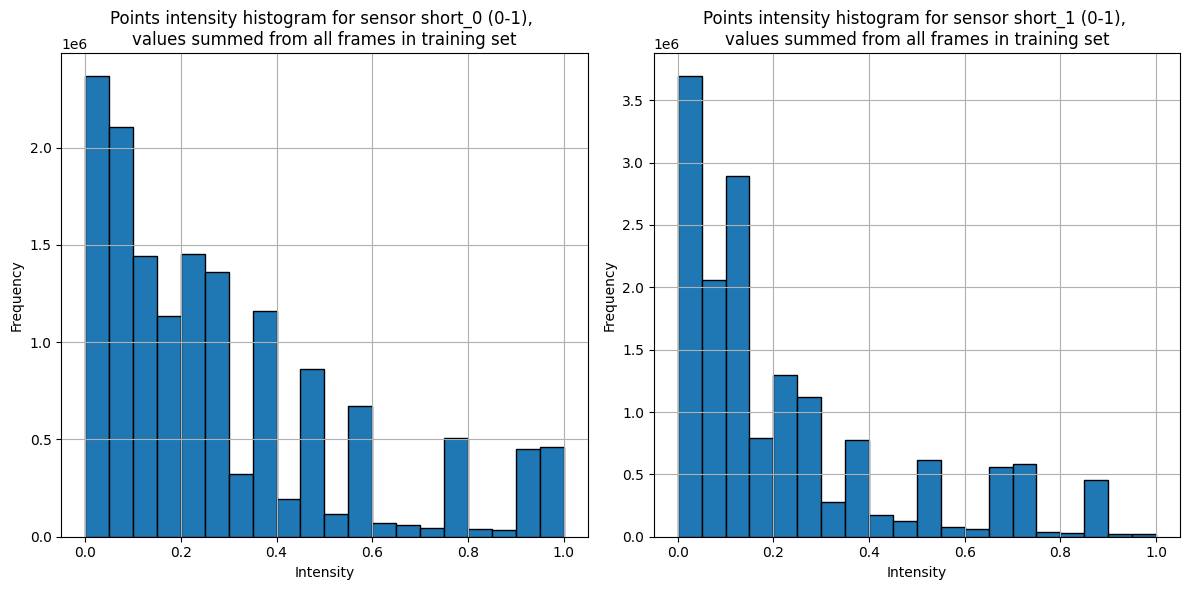

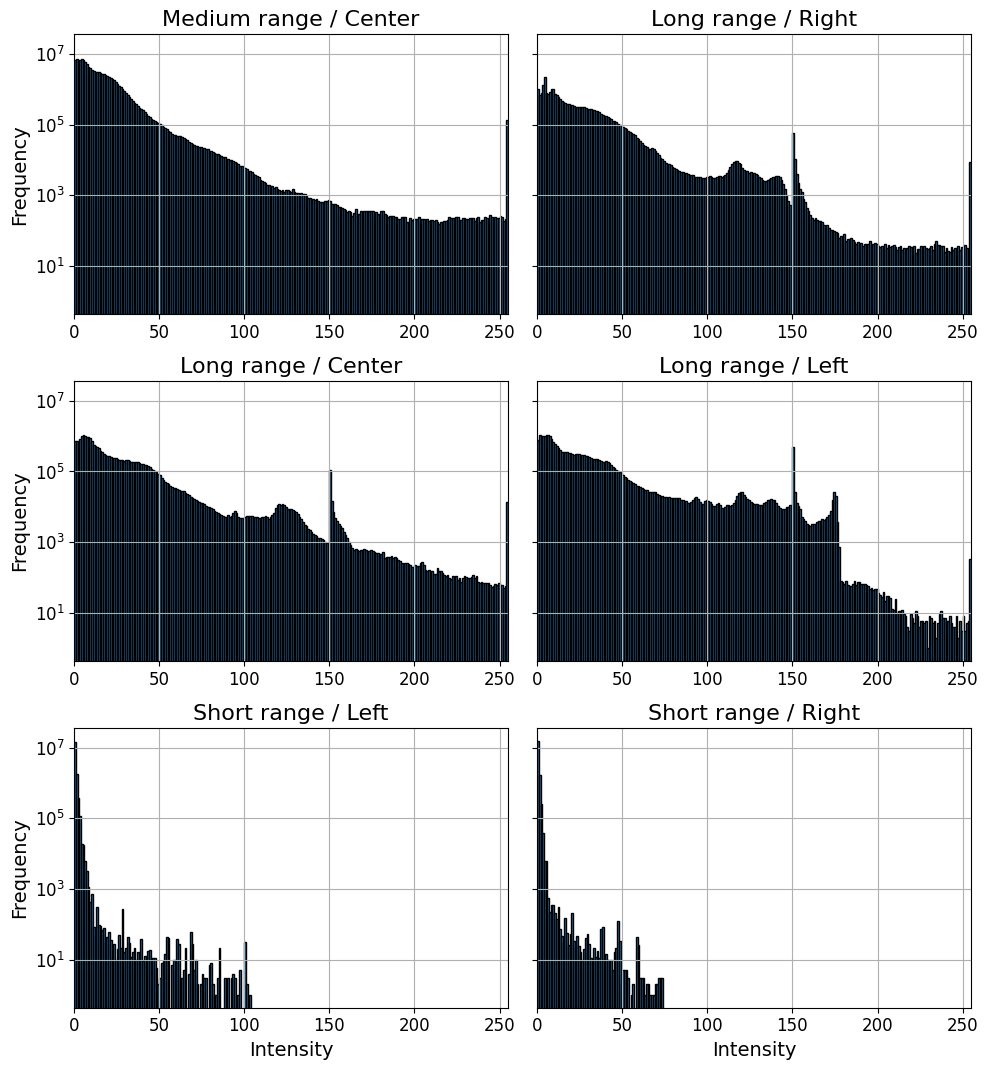


Intensity statistics for each sensor (averaged over all .pcd files):
                   index  Mean Intensity  Max Intensity  Min Intensity
0  Medium range / Center       12.407925          255.0       0.000000
1     Long range / Right       18.286674          255.0       0.000000
2    Long range / Center       20.053057          255.0       0.000000
3      Long range / Left       25.598067          255.0       0.000000
4     Short range / Left        0.460082          103.0       0.000027
5    Short range / Right        0.365501           73.5       0.000006


In [32]:
# Define sensor names
sensor_names = ['Medium range / Center', 'Long range / Right', 'Long range / Center', 'Long range / Left', 'Short range / Left', 'Short range / Right']

# Plot histograms for sensors 4 and 5 (small range)
plt.figure(figsize=(12, 6))

# Histogram for Sensor 4
plt.subplot(1, 2, 1)
plt.hist(bin_edges_small[:-1], bins=bin_edges_small, weights=histogram_4_small, edgecolor='black')
plt.title('Points intensity histogram for sensor short_0 (0-1), \nvalues summed from all frames in training set')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Sensor 5
plt.subplot(1, 2, 2)
plt.hist(bin_edges_small[:-1], bins=bin_edges_small, weights=histogram_5_small, edgecolor='black')
plt.title('Points intensity histogram for sensor short_1 (0-1), \nvalues summed from all frames in training set')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot histograms for each sensor (large range 0-255) in one figure with a large title
fig, axs = plt.subplots(3, 2, figsize=(10, 12), sharey=True)

# Create a large title for the entire figure
#fig.suptitle("Points intensity histogram,\nvalues summed from all frames in training set", fontsize=16, y=0.95)

# Plot histogram for each sensor
for i, sensor_id in enumerate(range(6)):
    ax = axs[i // 2, i % 2]
    ax.hist(bin_edges_large[:-1], bins=bin_edges_large, weights=histogram_large[sensor_id], edgecolor='black')
    ax.set_title(f'{sensor_names[sensor_id]}', fontdict={"size": 16})
    ax.set_xlim(0, 255)
    ax.set_yscale("log")
    ax.tick_params(axis='both', which='major', labelsize=12)
    if i in [4, 5]:
        ax.set_xlabel('Intensity', fontdict={"size": 14})
    if i in [0, 2, 4]:
        ax.set_ylabel('Frequency', fontdict={"size": 14})
    ax.grid(True)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make space for the large title
plt.savefig("/workspaces/baseline/exp/figures/report_figs/Intensity_hist.png", dpi=400, bbox_inches='tight')
plt.show()

# Print statistics
print("\nIntensity statistics for each sensor (averaged over all .pcd files):")
stats_df = pd.DataFrame({
    'Mean Intensity': intensity_mean,
    'Max Intensity': intensity_max,
    'Min Intensity': intensity_min
}, index=sensor_names)
stats_df.reset_index(inplace=True)
print(stats_df)


In [ ]:

# Extract the relevant data
sensor= stats_df['index']
mean_intensity = stats_df['Mean Intensity']
max_intensity = stats_df['Max Intensity']
min_intensity = stats_df['Min Intensity']

# Prepare the plot
x = np.arange(len(sensor))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

# Plot bars for each attribute
for attribute, measurement in zip(['Mean Intensity', 'Max Intensity', 'Min Intensity'], [mean_intensity, max_intensity, min_intensity]):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, labels=[f'{val:.2f}' for val in measurement], padding=3)
    multiplier += 1

# Add labels, title, and customize x-axis tick labels
ax.set_ylabel('Intensity')
ax.set_title('Average, max and min intensity per sensor,\n values computed on all frames from training set ')
ax.set_xticks(x + width, sensor)
ax.legend(loc='upper right')
ax.set_ylim(0, 300)  # Adjust y-axis limit if needed

plt.show()


## Getting values after normalizing 

In [33]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the base folder path
folder_path = "/workspaces/baseline/data/OSDaR_dataset/v_2"

# List of subfolders to consider
train_subfolders=["1_calibration_1.2","3_fire_site_3.1","3_fire_site_3.3","4_station_pedestrian_bridge_4.3","5_station_bergedorf_5.1","6_station_klein_flottbek_6.2","8_station_altona_8.1","8_station_altona_8.2","9_station_ruebenkamp_9.1","12_vegetation_steady_12.1","14_signals_station_14.1","15_construction_vehicle_15.1","20_vegetation_squirrel_20.1","21_station_wedel_21.1","21_station_wedel_21.2"]

# Generate the list of full paths for the specific subfolders
train_folders = [os.path.join(folder_path, subfolder) for subfolder in train_subfolders]


bin_edges = np.arange(0, 1.05, 0.05)
histogram_4_small = np.zeros(len(bin_edges_small) - 1)
histogram_5_small = np.zeros(len(bin_edges_small) - 1)
histogram_large = {i: np.zeros(len(bin_edges) - 1) for i in range(6)}

intensity_sums = np.zeros(6)
intensity_max = np.full(6, -np.inf)
intensity_min = np.full(6, np.inf)
intensity_counts = np.zeros(6)

# Process each specified subfolder
i=0
for folder in train_folders:
    print(f'Processing folder: {folder}')
    
    # Find all .pcd files in the current subfolder and its subfolders
    pcd_files = glob.glob(os.path.join(folder, '**', '*.pcd'), recursive=True)
    
    for pcd_file in pcd_files:
        print(f'Processing file: {pcd_file}')
        
        # Load the data from the .pcd file
        with open(pcd_file, "r") as b:
            scan = np.loadtxt(b, skiprows=11, usecols=(0, 1, 2, 3, 5))  # Assume that sensor_id is in column 5
        
        # Convert to DataFrame
        df = pd.DataFrame(data=scan, columns=["X", "Y", "Z", "intensity", "sensor_id"])

        df.loc[df.sensor_id==0, "intensity"] = (df[df["sensor_id"] == 0]["intensity"])/255
        df.loc[df.sensor_id==1, "intensity"] = df[df["sensor_id"] == 1]["intensity"]/255
        df.loc[df.sensor_id==2, "intensity"] = df[df["sensor_id"] == 2]["intensity"]/255
        df.loc[df.sensor_id==3, "intensity"] = df[df["sensor_id"] == 3]["intensity"]/255
        df.loc[df.sensor_id==4, "intensity"] = np.tanh(df[df["sensor_id"] == 4]["intensity"])
        df.loc[df.sensor_id==5, "intensity"] = np.tanh(df[df["sensor_id"] == 5]["intensity"])

        
        
        # Update histograms for all sensors (large range)
        for sensor_id in range(6):
            sensor_intensities = df[df["sensor_id"] == sensor_id]["intensity"]
            hist_large, _ = np.histogram(sensor_intensities, bins=bin_edges)
            histogram_large[sensor_id] += hist_large
            
            # Update statistics for each sensor
            if not sensor_intensities.empty:
                intensity_sums[sensor_id] += sensor_intensities.sum()
                intensity_counts[sensor_id] += sensor_intensities.count()
                intensity_max[sensor_id] = max(intensity_max[sensor_id], sensor_intensities.max())
                intensity_min[sensor_id] = min(intensity_min[sensor_id], sensor_intensities.min())
    
    break
# Calculate mean intensity for each sensor
intensity_mean = intensity_sums / intensity_counts




Processing folder: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/009_1631441714.999990000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/028_1631441716.899545000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/081_1631441722.199772000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/071_1631441721.199508000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/088_1631441722.899940000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/017_1631441715.799675000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/022_1631441716.299694000.pcd
Processing file: /workspaces/baseline/data/OSDaR_dataset/v_2/1_calibration_1.2/lidar/040_1631441718.099605000.pcd
Process

In [40]:
histogram_large[0]

array([5.994025e+06, 3.833015e+06, 7.121810e+05, 9.329800e+04,
       2.466500e+04, 5.223000e+03, 1.070000e+03, 3.740000e+02,
       1.850000e+02, 1.540000e+02, 7.500000e+01, 9.400000e+01,
       5.500000e+01, 5.200000e+01, 4.700000e+01, 6.000000e+01,
       4.100000e+01, 3.500000e+01, 4.800000e+01, 3.266000e+03])

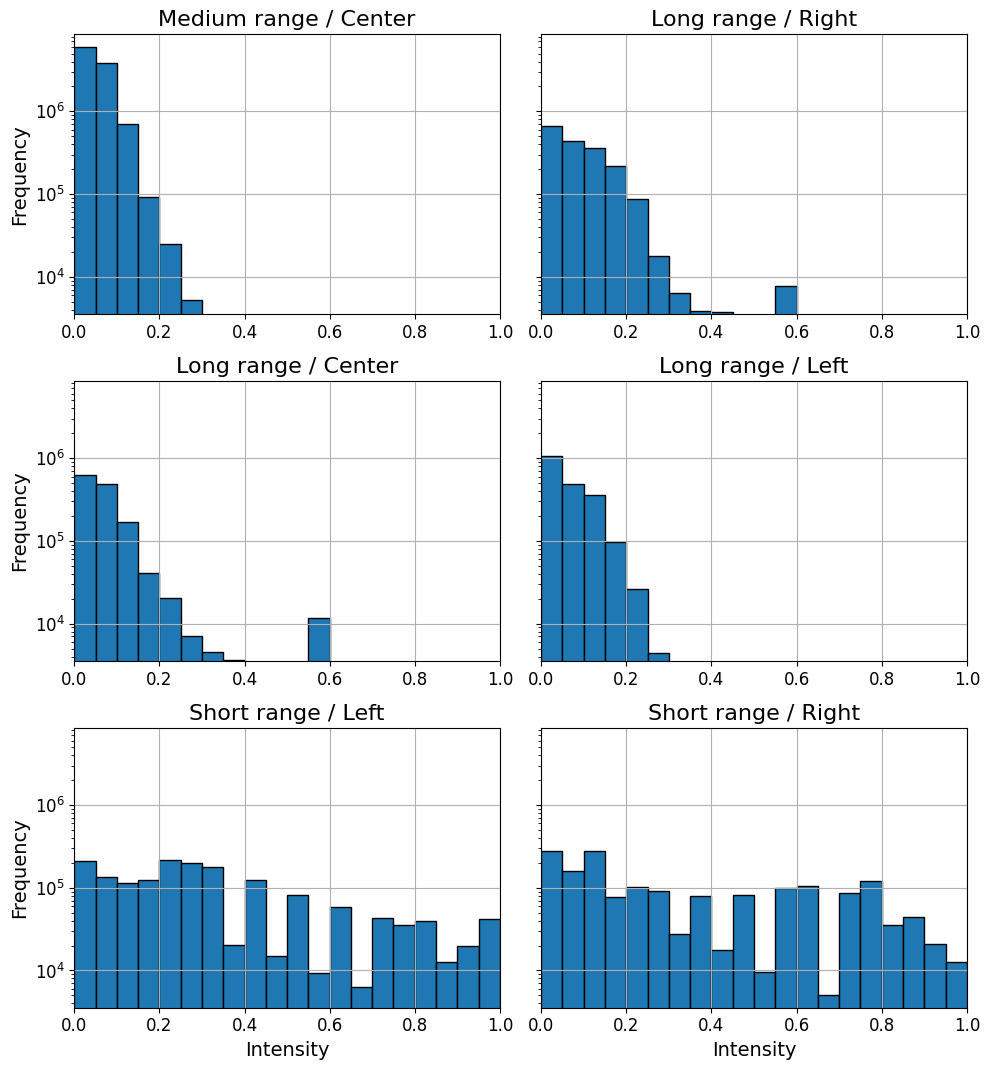

In [49]:
# Define sensor names
sensor_names = ['Medium range / Center', 'Long range / Right', 'Long range / Center', 'Long range / Left', 'Short range / Left', 'Short range / Right']


# Plot histograms for each sensor (large range 0-255) in one figure with a large title
fig, axs = plt.subplots(3, 2, figsize=(10, 12), sharey=True)


# Plot histogram for each sensor
for i, sensor_id in enumerate(range(6)):
    ax = axs[i // 2, i % 2]
    ax.hist(bin_edges[:-1], bins=bin_edges, weights=histogram_large[sensor_id], edgecolor='black')
    ax.set_title(f'{sensor_names[sensor_id]}', fontdict={"size": 16})
    ax.set_xlim(0, 1)
    ax.set_yscale("log")
    ax.tick_params(axis='both', which='major', labelsize=12)
    if i in [4, 5]:
        ax.set_xlabel('Intensity', fontdict={"size": 14})
    if i in [0, 2, 4]:
        ax.set_ylabel('Frequency', fontdict={"size": 14})
    ax.grid(True)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make space for the large title
plt.savefig("/workspaces/baseline/exp/figures/report_figs/Intensity_hist_after_norm.png", dpi=400, bbox_inches='tight')
plt.show()



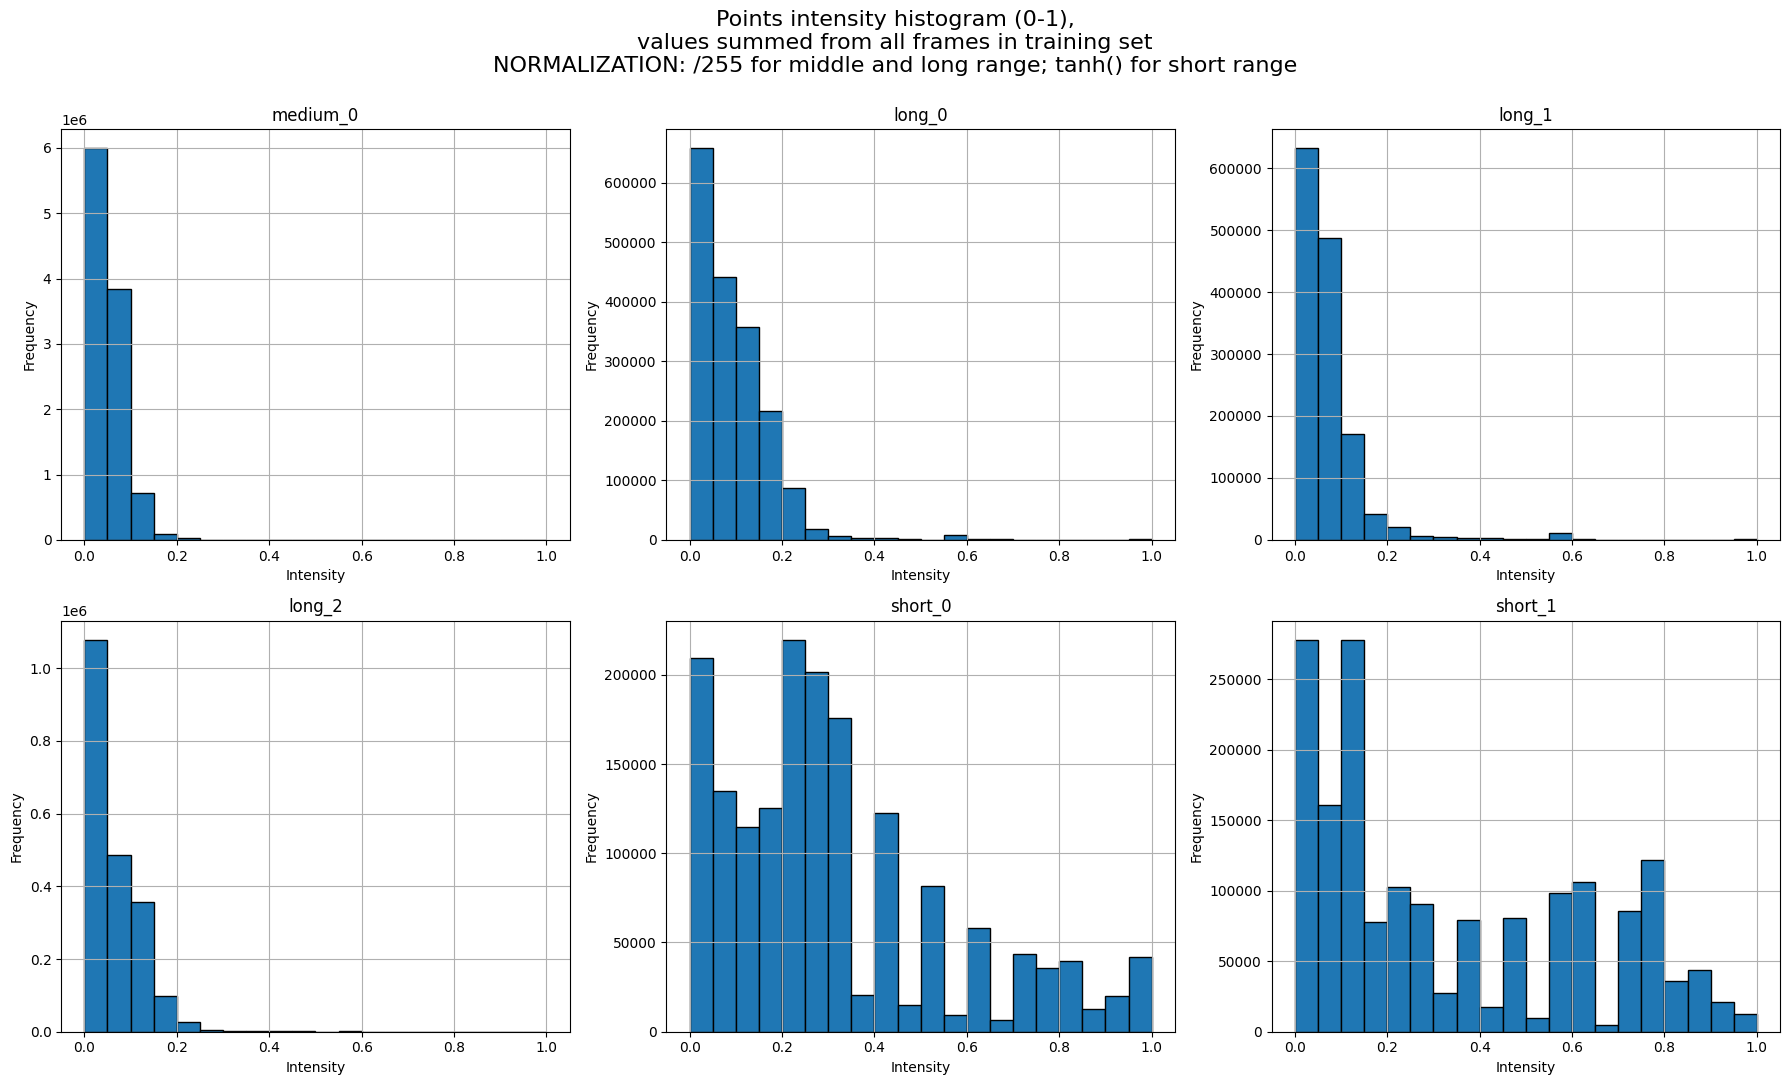


Intensity statistics for each sensor (averaged over all .pcd files):
      index  Mean Intensity  Max Intensity  Min Intensity
0  medium_0        0.049185            1.0       0.000000
1    long_0        0.092513            1.0       0.000000
2    long_1        0.071634            1.0       0.000000
3    long_2        0.062966            1.0       0.000000
4   short_0        0.310979            1.0       0.000027
5   short_1        0.335153            1.0       0.000027


In [36]:
# Define sensor names
sensor_names = ['medium_0', 'long_0', 'long_1', 'long_2', 'short_0', 'short_1']

# Plot histograms for each sensor (large range 0-255) in one figure with a large title
plt.figure(figsize=(18, 12))

# Create a large title for the entire figure
plt.suptitle("Points intensity histogram (0-1),\nvalues summed from all frames in training set\nNORMALIZATION: /255 for middle and long range; tanh() for short range", fontsize=16, y=0.95)

# Plot histogram for each sensor
for i, sensor_id in enumerate(range(6)):
    plt.subplot(2, 3, i + 1)
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=histogram_large[sensor_id], edgecolor='black')
    plt.title(f'{sensor_names[sensor_id]}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make space for the large title
plt.show()

# Print statistics
print("\nIntensity statistics for each sensor (averaged over all .pcd files):")
stats_df = pd.DataFrame({
    'Mean Intensity': intensity_mean,
    'Max Intensity': intensity_max,
    'Min Intensity': intensity_min
}, index=sensor_names)
stats_df.reset_index(inplace=True)
print(stats_df)


In [ ]:

# Extract the relevant data
sensor= stats_df['index']
mean_intensity = stats_df['Mean Intensity']
max_intensity = stats_df['Max Intensity']
min_intensity = stats_df['Min Intensity']

# Prepare the plot
x = np.arange(len(sensor))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

# Plot bars for each attribute
for attribute, measurement in zip(['Mean Intensity', 'Max Intensity', 'Min Intensity'], [mean_intensity, max_intensity, min_intensity]):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, labels=[f'{val:.2f}' for val in measurement], padding=3)
    multiplier += 1

# Add labels, title, and customize x-axis tick labels
ax.set_ylabel('Intensity')
ax.set_title('Average, max and min intensity per sensor,\n values computed on all frames from training set \nNORMALIZATION: /255 for middle and long range; tanh() for short range')
ax.set_xticks(x + width, sensor)
ax.legend(loc='center right')
ax.set_ylim(0, 1.10)  # Adjust y-axis limit if needed

plt.show()
